# COOKBOOK ESM

In [51]:
import pylab, numpy
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import interpolation
from scipy import interpolate
from astropy.io import fits
from scipy.interpolate import interp1d

#IMPORT Paste from Daniel Marsango author git HUB:
import perfil  
import doublespiral_image
import gaus_sub
from calcu import disk_base,radial_profile,spiral_arm,gaussian,arcselip,calculations,calcul5,calcul10,calculento


### Defina Parâmetros básicos das matriz 

In [52]:
######Parametros base da imagem #########
lambda0	=6562.8 #Comprimento de onda para modelagem, é possivel modelar todas as linhas em duplo-pico
ANGIi	= 68    #angulo de inclinação do disco
broad	=1200   #parâmetro de turbulência da célula
shift	=5 #added manually bluefhift ou redfith do disco  
n	    =20  #numero de pontos na matriz ///define a quantidade de pontos por pixel
xi	    =2500 #eixo x da matrix
xf	    =2500 #eixo y da matriz


Cria as matrizes de emissividade para cada estrutura

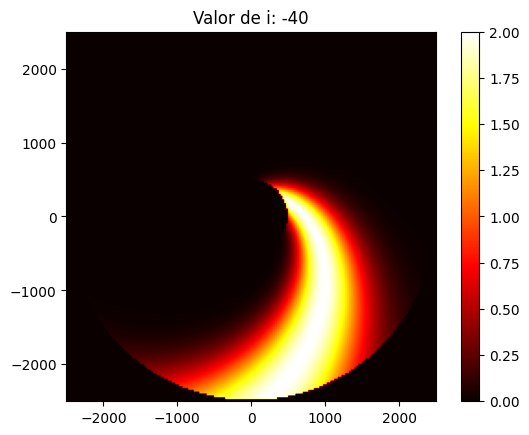

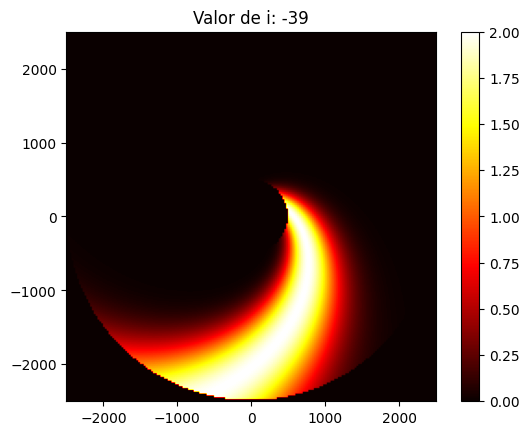

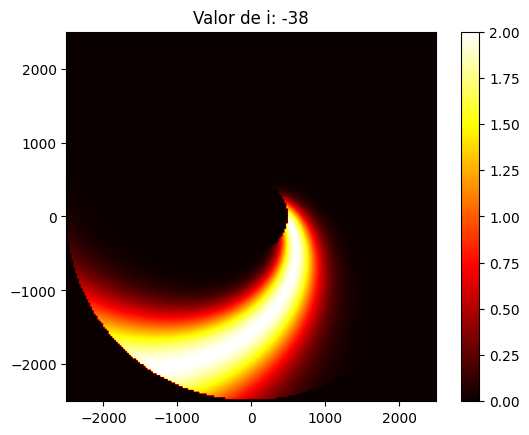

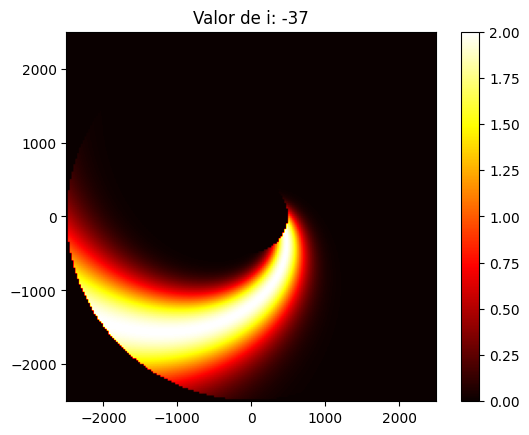

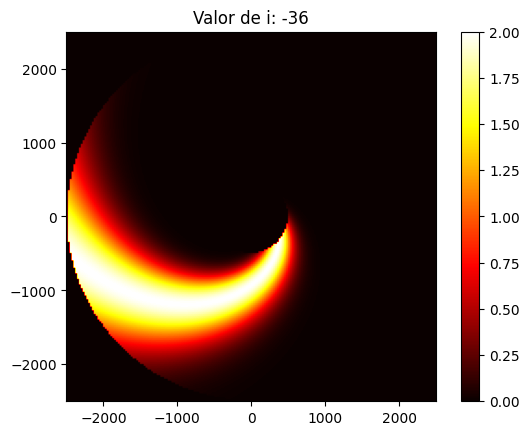

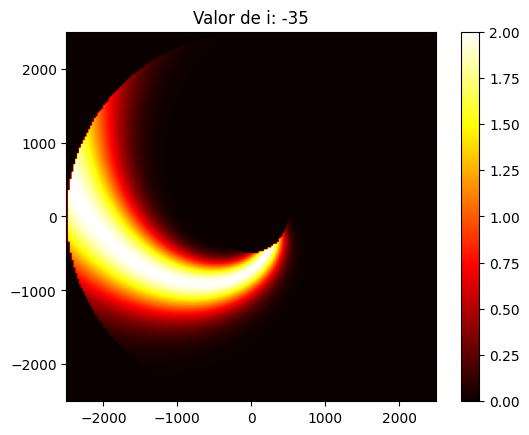

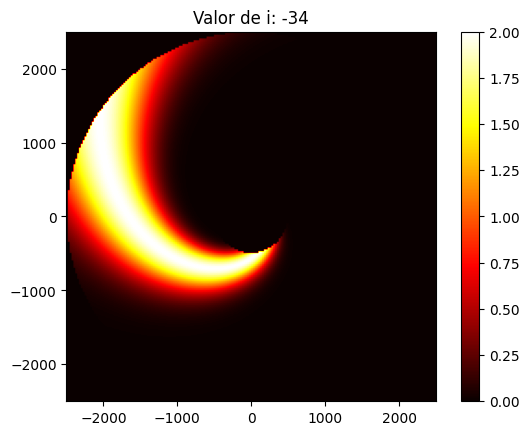

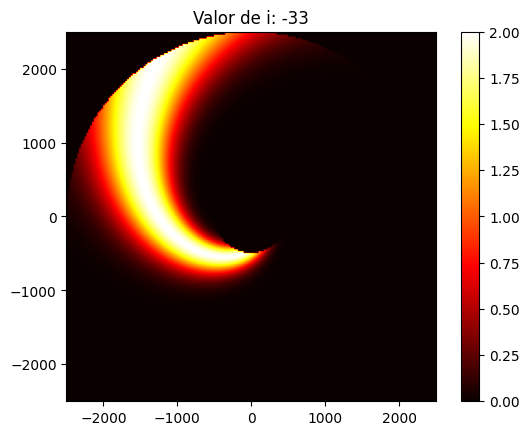

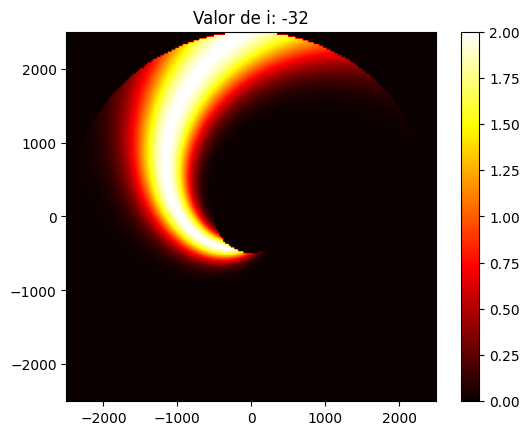

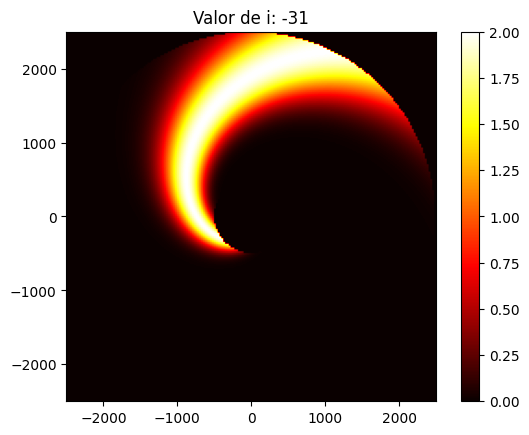

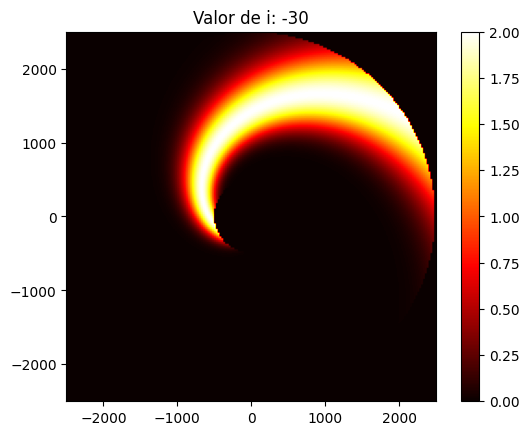

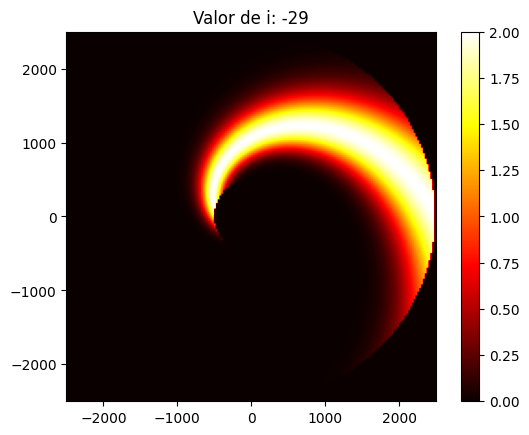

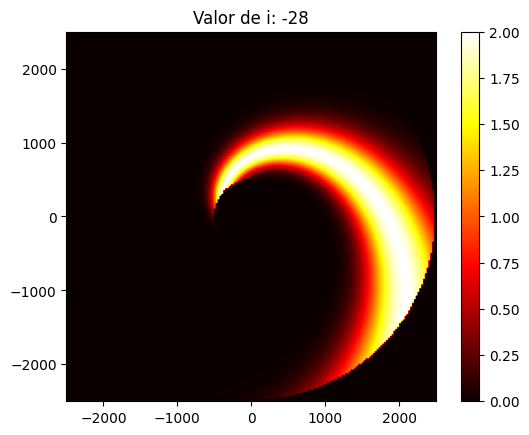

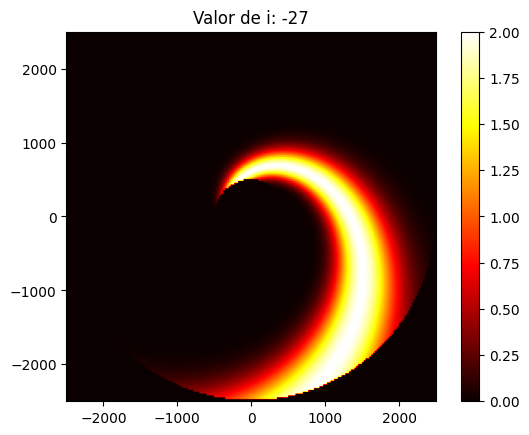

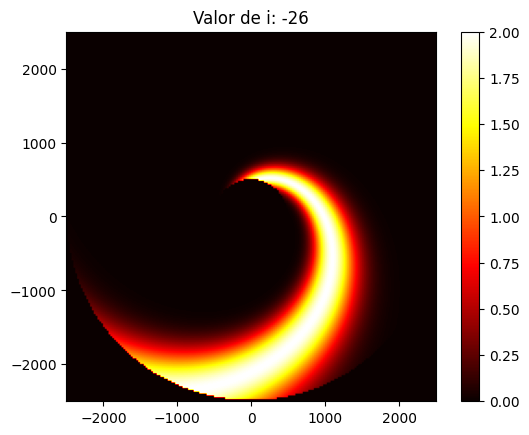

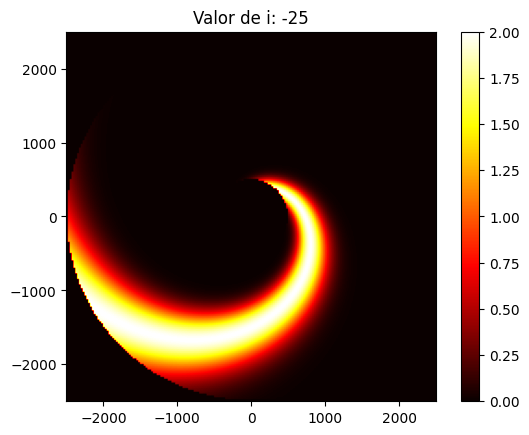

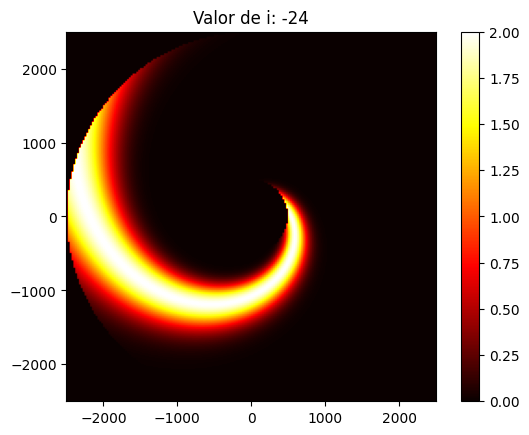

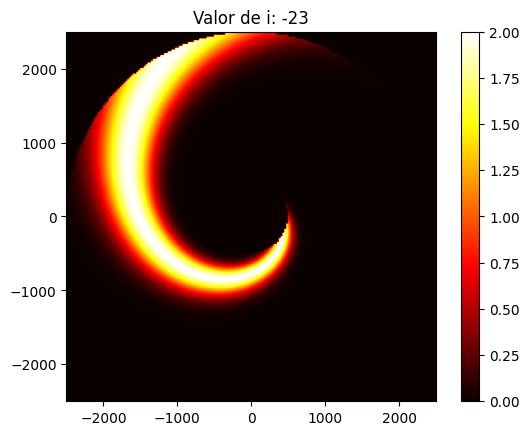

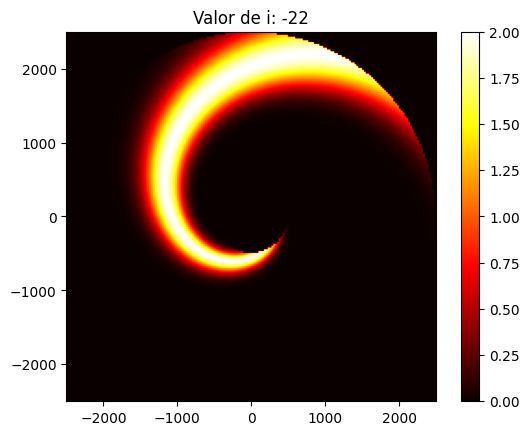

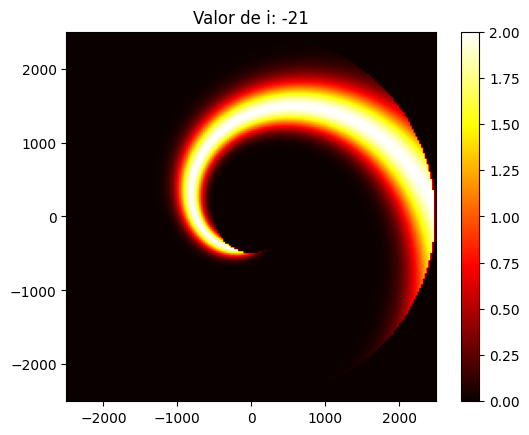

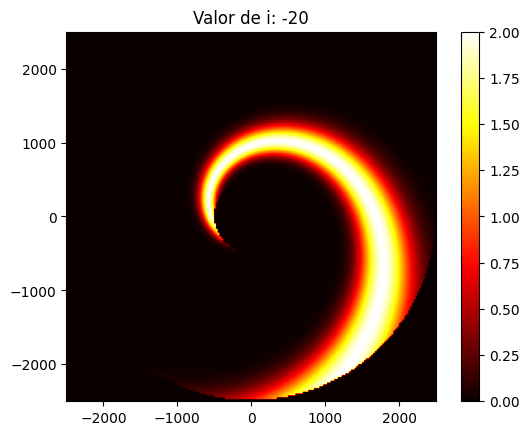

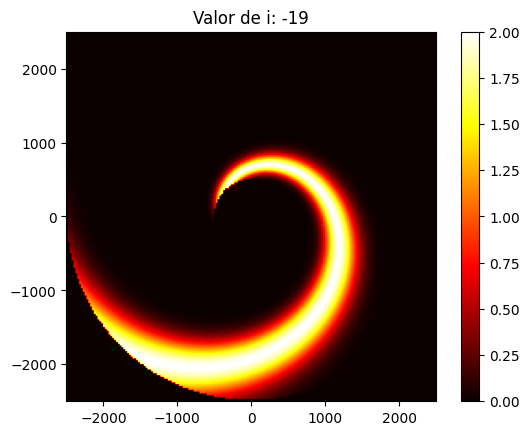

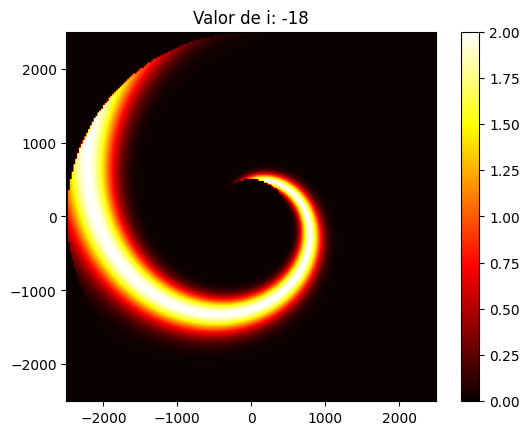

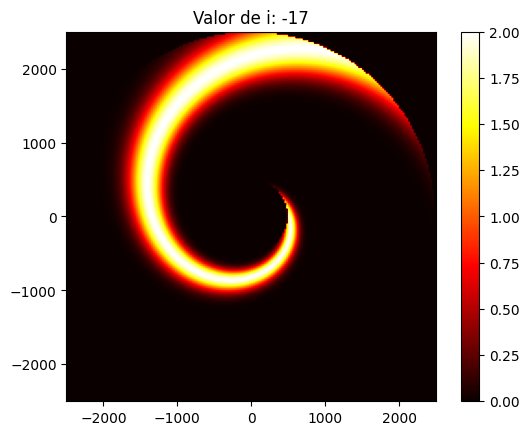

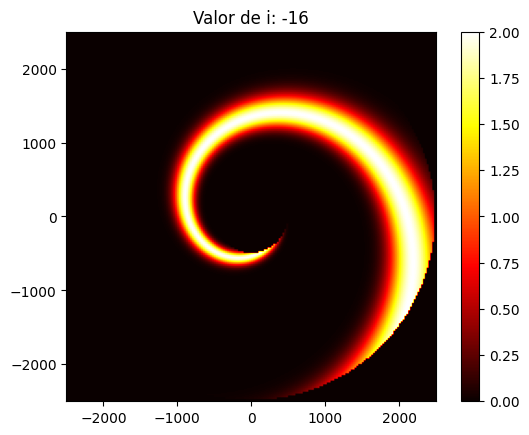

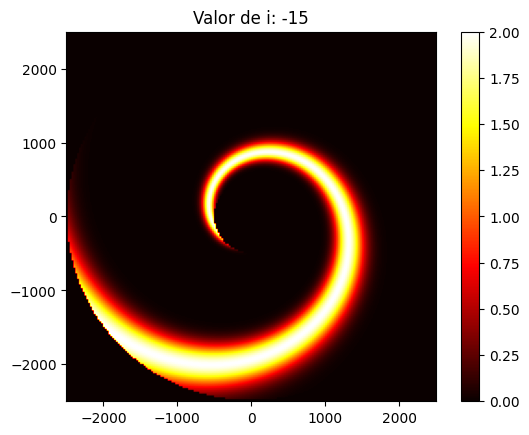

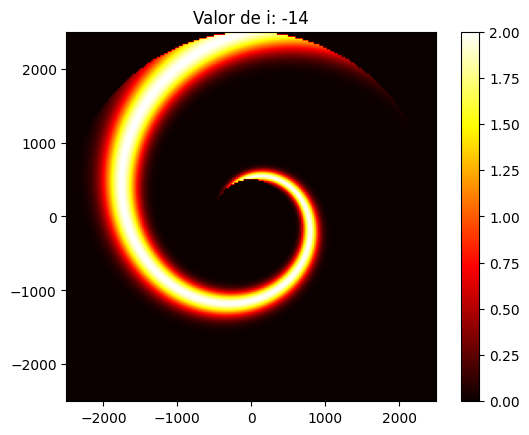

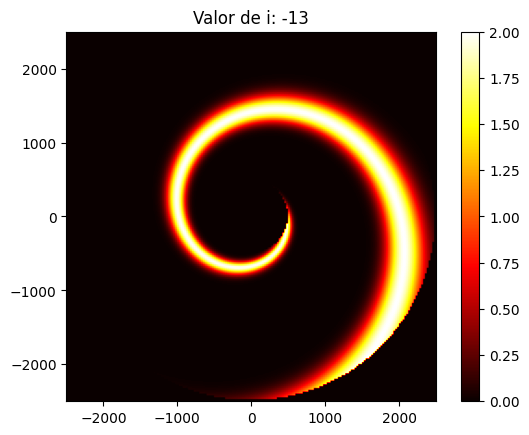

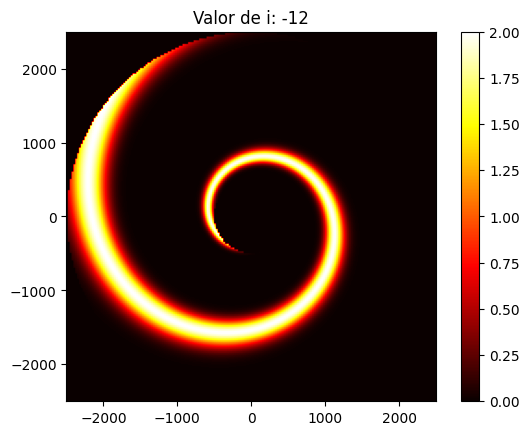

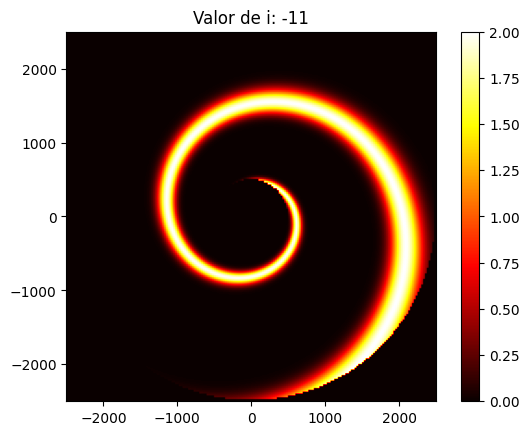

In [87]:
disk = disk_base(-xi, xf,n, 500, 2500)

# Gera uma matriz de emissividade para um disco radial quebrado
#def radial_profile(xi, xf, n, q1, q2, xiq):
#q1 e q2 lei de emissividade radial quebrada q1 valores negativos e Q2 positivos (emissividade cresce e decai)
#spiral_arm(xi, xf, n, phi00, xisp, pp, xiww): os braços são independentes pode-se adicionar varios para qualquer posição
arm = spiral_arm(-xi, xf,n,38, 500, 45, 147)
# Gera uma matriz de emissividade para um braço de espiral
#spiral_arm(xi, xf, n, phi00, xisp, pp, xiww)
disk_final=disk*2*arm
#or
#disk_final = disk*(rad*5*arm2+10*arm*g2)
#outra qualquer
plt.imshow(disk_final, extent=[-2500, 2500, -2500, 2500], vmin=0, vmax=2, cmap='hot')
for i in range(-40,-10,1):
    phi00 = i
    arm = spiral_arm(-xi, xf,n,30, 500, i, 50)
    disk_final = disk * 2 * arm

    # Plotar o resultado
    plt.imshow(np.rot90(disk_final,2), extent=[-2500, 2500, -2500, 2500], vmin=0, vmax=2, cmap='hot')

    plt.title(f'Valor de i: {i}')
    plt.colorbar()
    plt.show()

In [79]:
for i in range(80,80,40):
    phi00 = i
    arm = spiral_arm(-xi, xf,n,30, 500, i, 45)
    disk_final = disk * 2 * arm

    # Plotar o resultado
    plt.imshow(np.rot90(disk_final,2), extent=[-2500, 2500, -2500, 2500], vmin=0, vmax=2, cmap='hot')

    plt.title(f'Valor de i: {i}')
    plt.colorbar()
    plt.show()

In [90]:
##matrizes do disco e estruturas####

#gera matriz base do disco
#disk_base(xi, xf, n, xi1, xi2)
disk = disk_base(-xi, xf,n, 500, 2500)

# Gera uma matriz de emissividade para um disco radial quebrado
#def radial_profile(xi, xf, n, q1, q2, xiq):
#q1 e q2 lei de emissividade radial quebrada q1 valores negativos e Q2 positivos (emissividade cresce e decai)
rad = radial_profile(-xi, xf,n, -2.5, 3.1, 945)

# Gera uma matriz de emissividade para um braço de espiral
#spiral_arm(xi, xf, n, phi00, xisp, pp, xiww): os braços são independentes pode-se adicionar varios para qualquer posição
arm = spiral_arm(-xi, xf,n,38+120, 500, -45, 147)
arm2 = spiral_arm(-xi, xf,n, 77, 400, 20, 60)

# Gera uma matriz de emissividade gaussiana
#gaussian(xi, xf, n, mux, muy, sigmax, sigmay,angle_rot,angle_tran)
g = gaussian(-xi, xf,n, -1028, -73, 500,500,0,90)
g2 = gaussian(-xi, xf,n, -988, -1730, 1000,1000,0,-1)

# Gera uma matriz de emissividade em forma de arco elipse com translação
#def arcselip(xi, xf, n, a, b, theta0, scale, tangential_stretch, radial_stretch, curvature, rotation_angle,trans, center_x, center_y):
arcelp = arcselip(-xi, xf,n, 1, 2, numpy.radians(0), 100, 2, 5.2, 0.004, numpy.radians(0),0, 1000, 1000)

### Escreva qualquer expressão de emissividade com as matrizes criadas

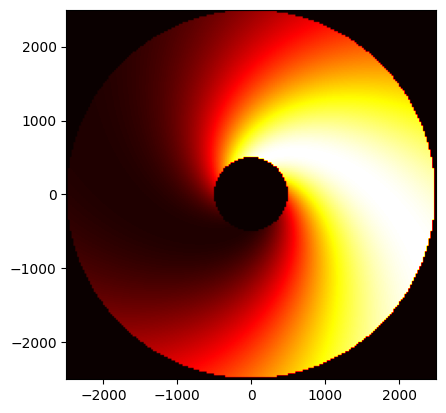

In [91]:
#EXAMPLE
disk_final = disk*(rad*(1+0.5*4.1*(arm)+4.8*arm2+0.2*g)+1.1*g2)
disk_final=disk*2*arm
#or
#disk_final = disk*(rad*5*arm2+10*arm*g2)
#outra qualquer
plt.imshow(disk_final, extent=[-2500, 2500, -2500, 2500], vmin=0, vmax=2, cmap='hot')
#disk_final=np.rot90(disk_final,2)

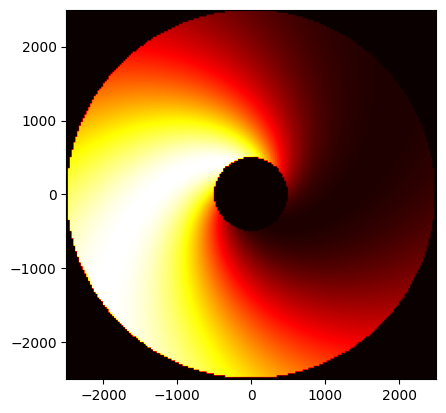

In [75]:
disk_final=np.rot90(disk_final,2)
plt.imshow(disk_final, extent=[-2500, 2500, -2500, 2500], vmin=0, vmax=2, cmap='hot')


### Calculate spectrum from map of emissivity

360


Conversão: 100%|████████████████████████| 295/295 [00:00<00:00, 30323.49ponto/s]


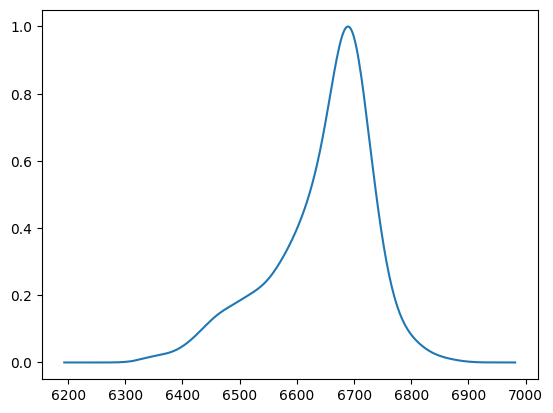

In [92]:

lam, flux,vel,points = calcul10(disk_final,lambda0,ANGIi,broad,xf,10)

# in calcul10(disk_final,lambda0,ANGIi,broad,xf,10) the value 10 in definition, use of diferential
#element of area, isto possibilita ajustar o espectro em poucos segundos. Elementos =1 podem demorar mais tempo 
#para calcular o perfil em duplo-pico.

plt.plot(lam,flux)


### Open Spectrum of our galaxy 

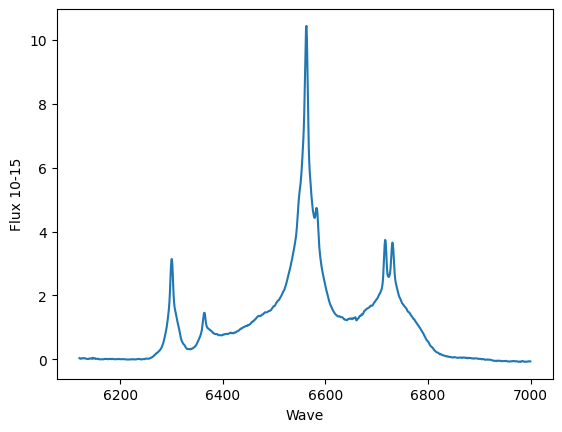

In [57]:
specobs='ha_comb_2012-10-15590ecAVG_Pictor_A_5900.fits'

# Open the FITS file
hdul = fits.open('ha_comb_2012-10-15590ecAVG_Pictor_A_5900.fits')

# Get the header information
header = hdul[0].header  # assuming the header is in the primary HDU


# Crie o vetor de onda
wave= np.linspace(header['CRVAL1'], header['CRVAL1'] + (header['NAXIS1']- 1) * header['CDELT1'], header['NAXIS1'])
fluxobs=hdul[0].data

plt.plot(wave,fluxobs)
plt.xlabel("Wave")
plt.ylabel("Flux 10-15")
plt.show()


# Close the FITS file



### Escalonando o Spectrum observed vs Spectrum from modelling

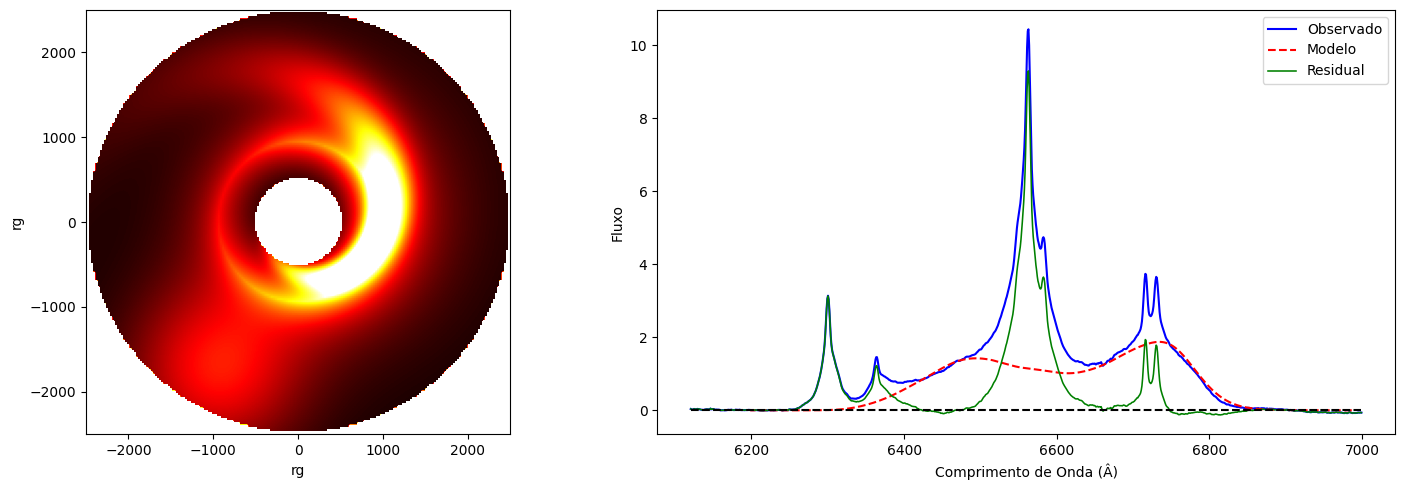

In [62]:
# Configurando o subplot
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

##axs[0]
disk_final[disk_final == 0] = 500 # para melhorar a visualização, mas é opcional
# Plot da matriz de emissividade
axs[0].imshow(disk_final, extent=[-2500, 2500, -2500, 2500], vmin=0, vmax=3, cmap='hot')
axs[0].set_xlabel('rg')
axs[0].set_ylabel('rg')

##axs[1]

#plot dados observacionais
axs[1].plot(wave,fluxobs, 'b-', lw=1.5, label="Observado")
####Scalonando Fluxo
w1 = [6475, 6480]      
i1 = (wave >= w1[0]) & (wave <= w1[1])
i2=(lam >= w1[0]) & (lam <= w1[1])
# Calcular a média e normalizar
mean_fluxobs = np.mean(fluxobs[i1])
mean_flux = np.mean(flux[i2])
scale = mean_fluxobs/mean_flux
#print(scale)
model_wave = lam+shift
model_flux = flux*scale

#################Plots##########################################
#################################################################
axs[1].plot(model_wave, model_flux, "r--", label="Modelo")
#subtrair do original para verificar se reproduziu toda linha larga
interp_model_flux = interpolate.interp1d(model_wave, model_flux, kind='linear', fill_value='extrapolate')
# Interpolate model_flux based on wave
model_flux_interp = interp_model_flux(wave)
# Subtract model_flux_interp from flux
subtracted_flux = fluxobs - model_flux_interp
axs[1].plot(wave, subtracted_flux,'g-',lw=1.15, label="Residual")

#linha em zero
zero = numpy.zeros(numpy.size(wave))
axs[1].plot(wave, zero, 'k--')
axs[1].legend()
axs[1].set_xlabel('Comprimento de Onda (Â)')
axs[1].set_ylabel('Fluxo') 

plt.tight_layout()
plt.savefig(specobs[0:18]+".jpg")
plt.show()
#plt.close()






### Estimate $\chi^{2}$ of diference from spectrum fitting modelling and spectrum observed

In [ ]:


########################################################chi-Square##############################################################################################################################
#################################################################################################################################################################################################
from scipy.stats import chisquare
from scipy.interpolate import interp1d

# Definir os intervalos de interesse
intervalo1 = (wave >= 6400) & (wave <= 6507)
intervalo2 = (wave >= 6617) & (wave <= 6700)
intervalo3 = (wave >= 6750) & (wave <= 6815)
# Criar função de interpolação para os dados do modelo
interp_model_flux = interp1d(model_wave, model_flux, kind='linear', fill_value='extrapolate')

# Avaliar as funções interpoladas nos intervalos de observação
model_flux_intervalo1 = interp_model_flux(wave[intervalo1])
model_flux_intervalo2 = interp_model_flux(wave[intervalo2])
model_flux_intervalo3 = interp_model_flux(wave[intervalo3])
# Concatenar os intervalos para formar o intervalo combinado
intervalo_combinado = np.concatenate([wave[intervalo1], wave[intervalo2],wave[intervalo3]])
fluxo_combinado_obs = np.concatenate([fluxobs[intervalo1], fluxobs[intervalo2],fluxobs[intervalo3]])
fluxo_combinado_modelo = np.concatenate([model_flux_intervalo1, model_flux_intervalo2,model_flux_intervalo3])


# Normalizar as frequências observadas e esperadas
observed_normalized_combinado = fluxo_combinado_obs / np.mean(fluxo_combinado_obs)
expected_normalized_combinado = fluxo_combinado_modelo / np.mean(fluxo_combinado_modelo)

# Calcular chi-square para o intervalo combinado
chi2_combinado, p_value_combinado = chisquare(f_obs=observed_normalized_combinado, f_exp=expected_normalized_combinado)

# Examinar os resultados
print(f'Chi-square para o intervalo combinado: {chi2_combinado}, p-value: {p_value_combinado}')




















In [ ]:
Plot region chi-square

In [ ]:
# Configurando o subplot
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

##axs[0]
# Plot da matriz de emissividade
axs[0].imshow(disk_final, extent=[-2500, 2500, -2500, 2500], vmin=0, vmax=3, cmap='hot')
axs[0].set_xlabel('rg')
axs[0].set_ylabel('rg')

##axs[1]

#plot dados observacionais
axs[1].plot(wave,fluxobs, 'b-', lw=1.5, label="Observado")
####Scalonando Fluxo
w1 = [6475, 6480]      
i1 = (wave >= w1[0]) & (wave <= w1[1])
i2=(lam >= w1[0]) & (lam <= w1[1])
# Calcular a média e normalizar
mean_fluxobs = np.mean(fluxobs[i1])
mean_flux = np.mean(flux[i2])
scale = mean_fluxobs/mean_flux
#print(scale)
model_wave = lam+shift
model_flux = flux*scale

#################Plots##########################################
#################################################################
axs[1].plot(model_wave, model_flux, "r--", label="Modelo")
#linha em zero
zero = numpy.zeros(numpy.size(wave))
axs[1].plot(wave, zero, 'k--')


###região de comparação de ajuste para estimar chisquare
intervalo1 = (wave >= 6400) & (wave <= 6507)
intervalo2 = (wave >= 6617) & (wave <= 6700)
intervalo3 = (wave >= 6750) & (wave <= 6815)
# Plotar Intervalo 1
axs[1].plot(wave[intervalo1], fluxobs[intervalo1], 'k-', lw=3.5, label=r"Inter. $\chi^{2}$")
# Plotar Intervalo 2
axs[1].plot(wave[intervalo2], fluxobs[intervalo2], 'k-', lw=3.5)
# Plotar Intervalo 3
axs[1].plot(wave[intervalo3], fluxobs[intervalo3], 'k-', lw=3.5)



axs[1].legend()
axs[1].set_xlabel('Comprimento de Onda (Â)')
axs[1].set_ylabel('Fluxo') 

plt.tight_layout()
plt.savefig(specobs[0:18]+".jpg")
plt.show()
# Examinar os resultados
print(f'Chi-square para o intervalo combinado: {chi2_combinado:.3g}, p-value: {p_value_combinado}')




